# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for better-looking visualizations

In [2]:
# Load the dataset
df = pd.read_csv("/Users/vijeethvj8/Downloads/Elevateme/Caspstone 1/HR-Analytics.csv")  

# Check the first few rows of the dataset
print(df.head())

# Display dataset shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names and their data types
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
# EmployeeCount → Always 1 (not useful).
# Over18 → All employees are over 18 (not useful).
# StandardHours → Fixed at 80 for everyone (not useful).
# EmployeeNumber → Unique ID (not relevant for predictions).


# Drop unnecessary columns
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

# Verify the remaining columns
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any exist
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [5]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical columns
binary_cols = ['Attrition', 'OverTime', 'Gender']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for categorical columns with more than two categories
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Verify the changes
print(df.head())


   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0          94               3         2  ...   
1                        3       1          61               2         2  ...   
2                        4       1          92               2         1  ...   
3                        4       0          56               3         1  ...   
4                        1       1          40               3         1  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                    False                          False           

In [6]:
# Check the updated dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

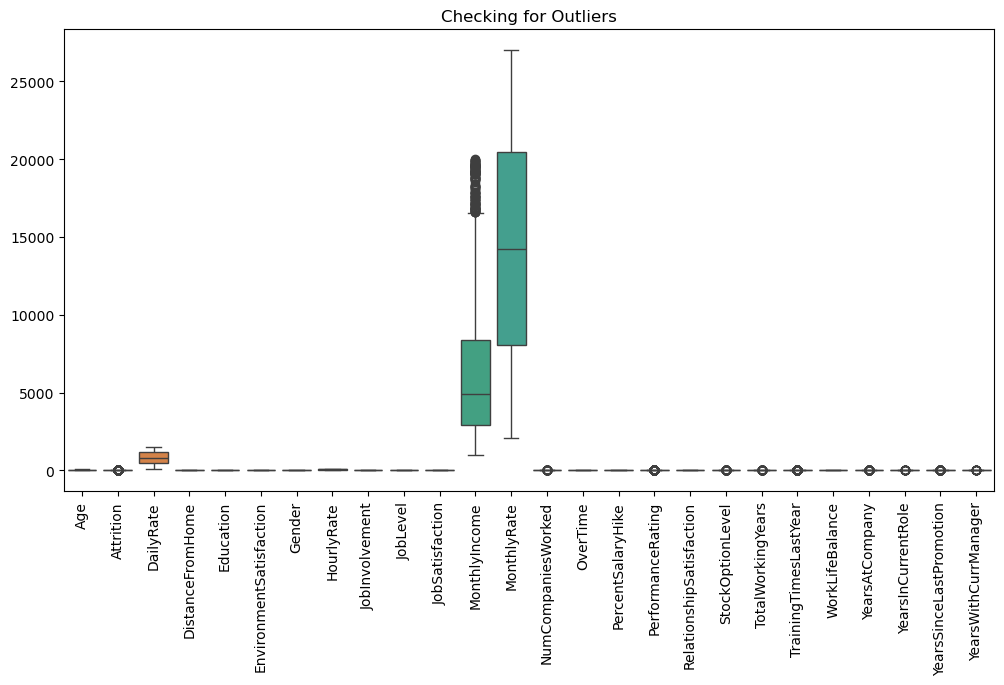

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all object-type columns to categorical explicitly
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Re-run the boxplot after conversion
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']))  # Ensure only numerical columns are used
plt.xticks(rotation=90)
plt.title("Checking for Outliers")
plt.show()




In [8]:
# Summary of Step 2 (Data Preprocessing)
# Removed unnecessary columns.
# Checked and removed duplicates (if any).
# Converted categorical variables into numerical format.
# Checked for outliers and prepared the data for analysis.

# Identified outliers in MonthlyIncome.
# Used IQR capping to limit extreme values in MonthlyIncome.
# Retained other features for further analysis.

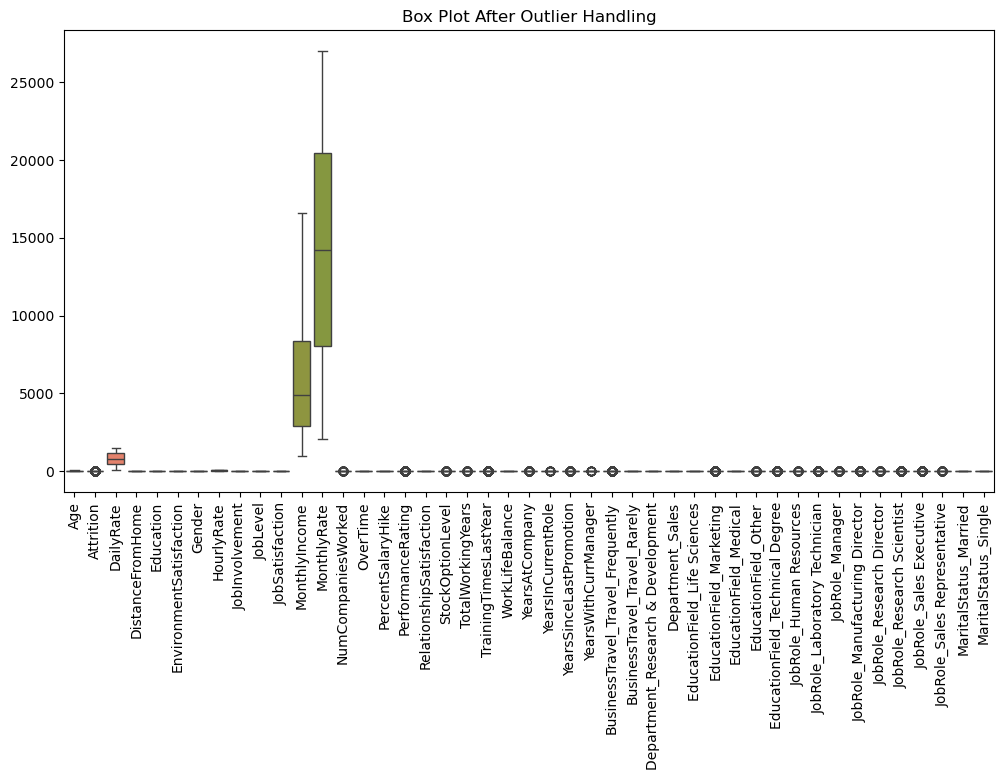

In [9]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)  # Cap values
    return df

# Apply outlier treatment to MonthlyIncome
df = remove_outliers(df, 'MonthlyIncome')

# Verify changes with another box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot After Outlier Handling")
plt.show()


In [10]:
# Define age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '30-40', '40-50', '50-60'])

# Verify the changes
print(df[['Age', 'AgeGroup']].head())


   Age AgeGroup
0   41    40-50
1   49    40-50
2   37    30-40
3   33    30-40
4   27    18-30


In [11]:
# Define tenure categories
df['TenureCategory'] = pd.cut(df['YearsAtCompany'], bins=[0, 3, 7, 15, 40], labels=['0-3 Years', '4-7 Years', '8-15 Years', '15+ Years'])

# Verify the changes
print(df[['YearsAtCompany', 'TenureCategory']].head())


   YearsAtCompany TenureCategory
0               6      4-7 Years
1              10     8-15 Years
2               0            NaN
3               8     8-15 Years
4               2      0-3 Years


In [12]:
# Seniority levels binning
df['Seniority'] = pd.cut(df['TotalWorkingYears'], bins=[0, 5, 9, 19, 50], 
                         labels=['Junior', 'Mid-Level', 'Senior', 'Expert'], right=True)

# Verify the changes
print(df[['TotalWorkingYears', 'Seniority']].head(10))


   TotalWorkingYears  Seniority
0                  8  Mid-Level
1                 10     Senior
2                  7  Mid-Level
3                  8  Mid-Level
4                  6  Mid-Level
5                  8  Mid-Level
6                 12     Senior
7                  1     Junior
8                 10     Senior
9                 17     Senior


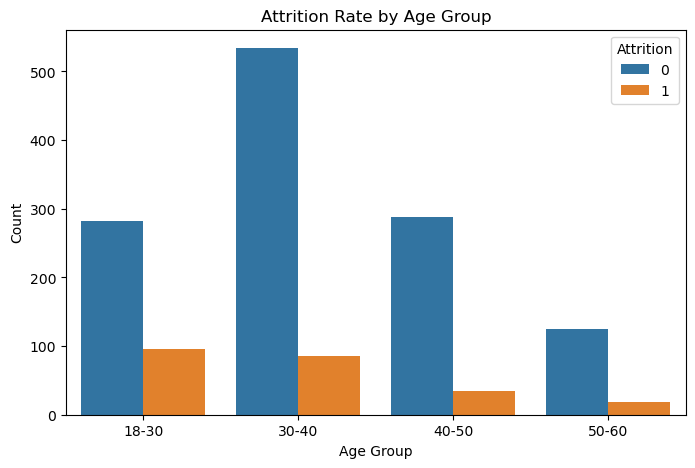

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Attrition', data=df)
plt.title("Attrition Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


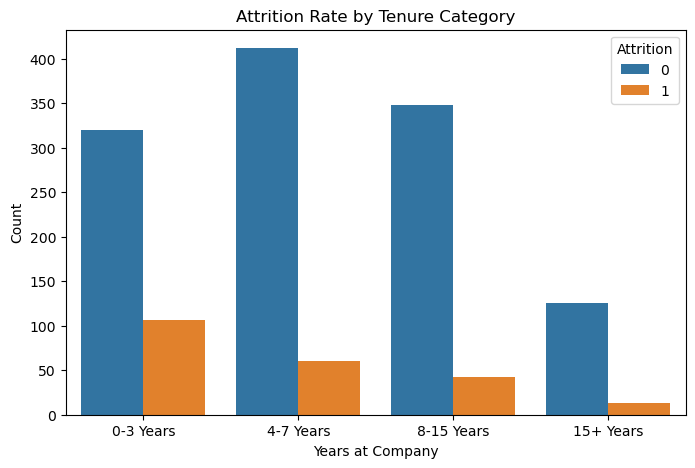

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='TenureCategory', hue='Attrition', data=df)
plt.title("Attrition Rate by Tenure Category")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()


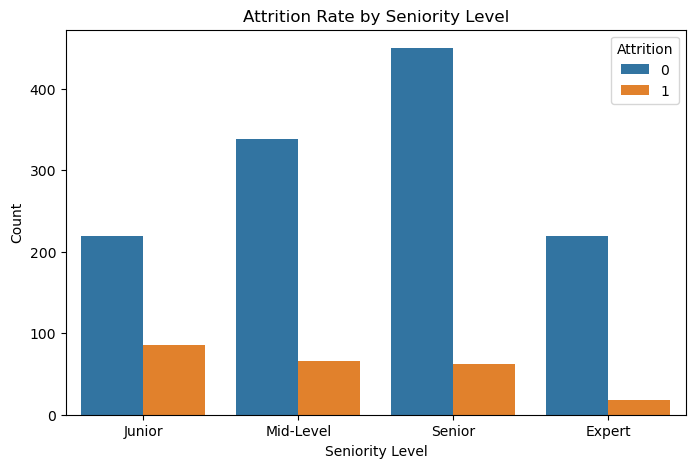

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Seniority', hue='Attrition', data=df)
plt.title("Attrition Rate by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
label_cols = ['AgeGroup', 'TenureCategory', 'Seniority']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Verify that all columns are now numeric
print(df.dtypes)


Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
Gender                               int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

In [17]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for non-numeric columns
print("\nNon-numeric columns:\n", df.select_dtypes(exclude=['number']).columns)

# Check for infinite values
print("\nInfinite values:\n", df.replace([np.inf, -np.inf], np.nan).isnull().sum())


Missing values:
 Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWit

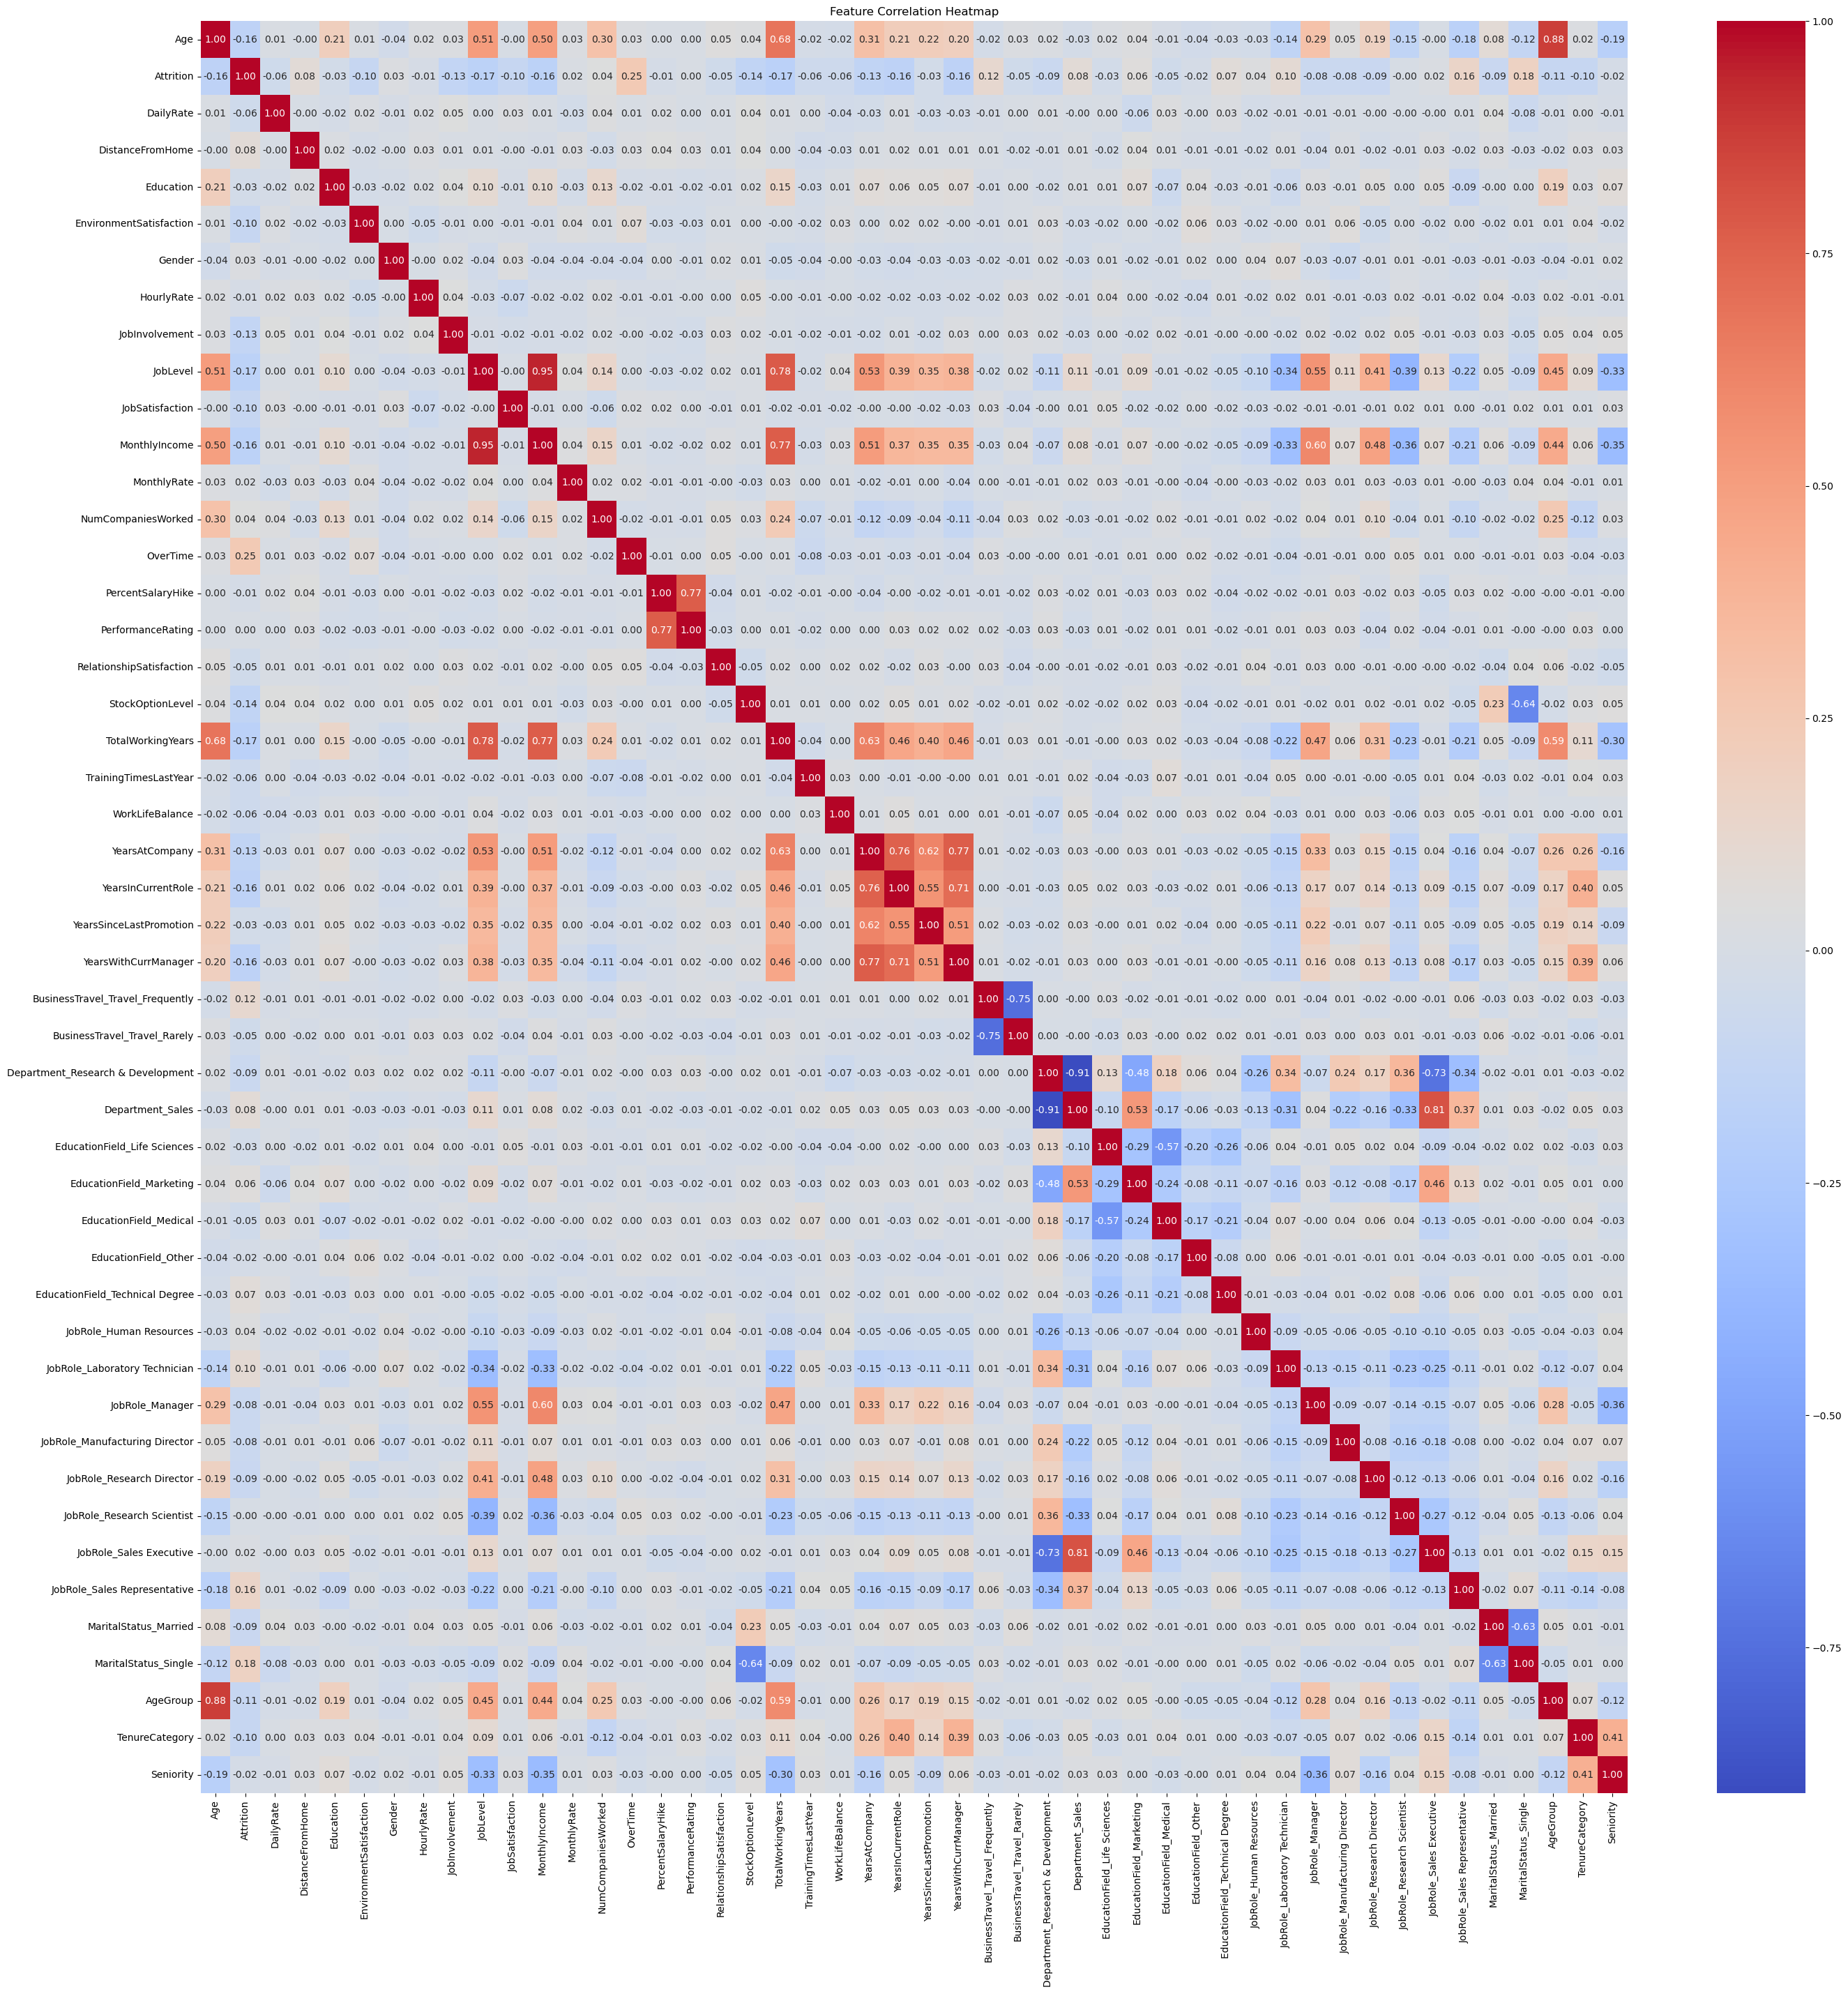

In [18]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number', 'bool'])  # Include boolean as well

# Generate the heatmap
plt.figure(figsize=(33,33))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')  # Saves as an image
plt.show()


In [19]:
print(df.columns)  # This will list all column names

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobR

In [20]:
# Define target variable (y)
y = df['Attrition']  

# Drop only existing columns
columns_to_drop = ['Attrition', 'EmployeeNumber', 'StandardHours', 'EmployeeCount', 'Over18']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Keep only present columns

# Drop the columns
X = df.drop(columns=columns_to_drop)

# Verify shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1470, 47)
Shape of y: (1470,)


In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (1176, 47) (1176,)
Testing Set Shape: (294, 47) (294,)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with Scaled Data
#logreg = LogisticRegression(max_iter=2000, random_state=42)  # Increase iterations if needed
#logreg.fit(X_train_scaled, y_train)

logreg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)


# Predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.7483
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.34      0.64      0.45        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.83      0.75      0.77       294



In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8299319727891157
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.33      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.59      0.52      0.51       294
weighted avg       0.76      0.83      0.78       294



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294



In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, scale_pos_weight=len(y_train)/sum(y_train), random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.52      0.32      0.39        47

    accuracy                           0.84       294
   macro avg       0.70      0.63      0.65       294
weighted avg       0.82      0.84      0.83       294



In [27]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.05, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.69      0.19      0.30        47

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294



In [28]:
# Use CatBoost as the best-performing model.
# Boost Class 1 Recall by Adjusting Hyperparameters.

In [29]:
cat_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.03, random_state=42, verbose=0)


In [30]:
cat_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.03, class_weights=[1, 5], random_state=42, verbose=0)


In [31]:
if hasattr(cat_model, "tree_count_"):
    print("Model is trained.")
else:
    print("Model is NOT trained. Re-run the `fit()` method.")

Model is trained.


In [32]:
cat_model = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.03,
    loss_function='Logloss',  # Enables probability predictions
    random_state=42,
    verbose=0
)
cat_model.fit(X_train, y_train)

y_probs = cat_model.predict_proba(X_test)[:, 1]  # Should now work

In [33]:
y_probs = cat_model.predict_proba(X_test)[:, 1]  # Get probabilities for Class 1 (Attrition)

In [34]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold where precision and recall are balanced
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid division by zero
best_idx = np.argmax(f1_scores)  # Index of best F1 score
best_threshold = thresholds[best_idx]

print(f"Best threshold to balance precision & recall: {best_threshold:.2f}")

Best threshold to balance precision & recall: 0.13


In [35]:
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Evaluate the new threshold's impact
from sklearn.metrics import classification_report

print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       247
           1       0.51      0.55      0.53        47

    accuracy                           0.84       294
   macro avg       0.71      0.73      0.72       294
weighted avg       0.85      0.84      0.85       294



In [36]:
# Save predictions to a CSV file
output_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
output_df.to_csv("predictions_output.csv", index=False)
print("Predictions saved successfully!")

Predictions saved successfully!


In [37]:
# 🎯 Final Interpretation
# The model is good at predicting employees who will stay (91% precision, 90% recall).
# The model improved in predicting who will leave (Attrition)—previous models had very low recall (~19%), now it’s 55%.
# Some employees who actually stay are being misclassified as attrition (51% precision for Class 1 means false positives still exist).
# This model is a strong starting point for HR analytics but can be further optimized.